In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from ast import literal_eval

df = pd.read_csv('../data/processed/futurice/ada_embedded.csv')
df_stats = pd.read_csv('../data/processed/futurice/blogs_with_analytics.csv')
df_stats = df_stats[['link', 'views']]

df = df.merge(df_stats, on='link', how='left')
df

In [12]:
X1 = np.vstack(df['title'].apply(literal_eval).apply(np.array).values)
X2 = np.vstack(df['teaser text'].apply(literal_eval).apply(np.array).values)
X3 = np.vstack(df['full text'].apply(literal_eval).apply(np.array).values)

In [13]:
pca = PCA(n_components=3)
X1_pca = pca.fit_transform(X1)
X2_pca = pca.fit_transform(X2)
X3_pca = pca.fit_transform(X3)

In [14]:
X1_pca.shape

(512, 3)

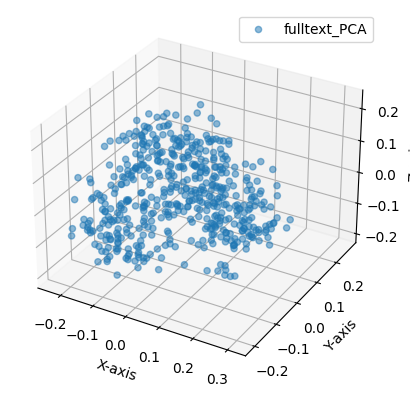

In [15]:
# Extract the first and second columns as X and Y values for each array
X1_X = [point[0] for point in X1_pca]
X1_Y = [point[1] for point in X1_pca]
X1_Z = [point[2] for point in X1_pca]

X2_X = [point[0] for point in X2_pca]
X2_Y = [point[1] for point in X2_pca]
X2_Z = [point[2] for point in X2_pca]

X3_X = [point[0] for point in X3_pca]
X3_Y = [point[1] for point in X3_pca]
X3_Z = [point[2] for point in X3_pca]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X1_X, X1_Y, X1_Z, label='X1_PCA', alpha=0.5)
#ax.scatter(X2_X, X2_Y, X2_Z, label='teaser_PCA', alpha=0.5)
ax.scatter(X3_X, X3_Y, X3_Z, label='fulltext_PCA', alpha=0.5)

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.legend()

# Show the 3D plot

plt.show()

In [16]:
pca = PCA(n_components=2)
X3_pca = pca.fit_transform(X3)

array([[-0.11436879,  0.03214893],
       [-0.08321868, -0.005869  ],
       [-0.08818531, -0.06341983],
       ...,
       [ 0.10377723, -0.06638193],
       [ 0.08783088,  0.1142935 ],
       [ 0.06543368,  0.12992856]])

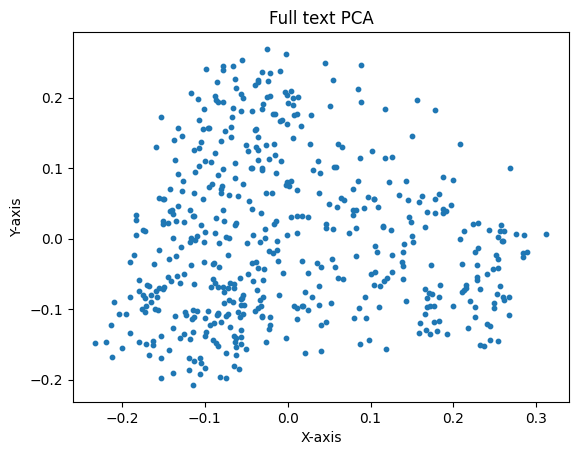

In [17]:
X3_pca.tolist()
x = [point[0] for point in X3_pca]
y = [point[1] for point in X3_pca]

plt.scatter(x, y, marker='o', s=10)  # 'o' represents dots as markers, s is the marker size

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Full text PCA')

# Show the plot
plt.show()

In [20]:
from sklearn.cluster import KMeans

# define the model
Xfeatures = X3_pca
model = KMeans(n_clusters=4)
model.fit(Xfeatures)
pred = model.predict(Xfeatures)

plt.figure(figsize=(20, 10))
plt.title('cluster of blogs (according to full text)')
sns.scatterplot(data=X3_pca, x=, y='teaser pca', hue='cluster')
plt.show()


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [93]:
from sklearn.cluster import KMeans

# define the model
Xfeatures = df[['title pca', 'teaser pca']]
model = KMeans(n_clusters=3)
model.fit(Xfeatures)
pred = model.predict(Xfeatures)

# result
df['cluster'] = pred
df[['link', 'cluster']].head()

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,link,cluster
0,https://futurice.com/blog/designops-small-team...,1
1,https://futurice.com/blog/european-accessibili...,1
2,https://futurice.com/blog/group-decision-makin...,1
3,https://futurice.com/blog/futustories-from-con...,0
4,https://futurice.com/blog/car-companion-apps,1


<Axes: xlabel='cluster', ylabel='count'>

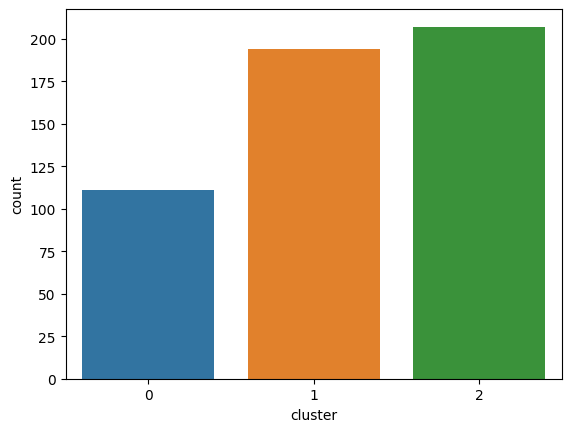

In [94]:
# Cluster distribution
sns.countplot(x='cluster', data=df)

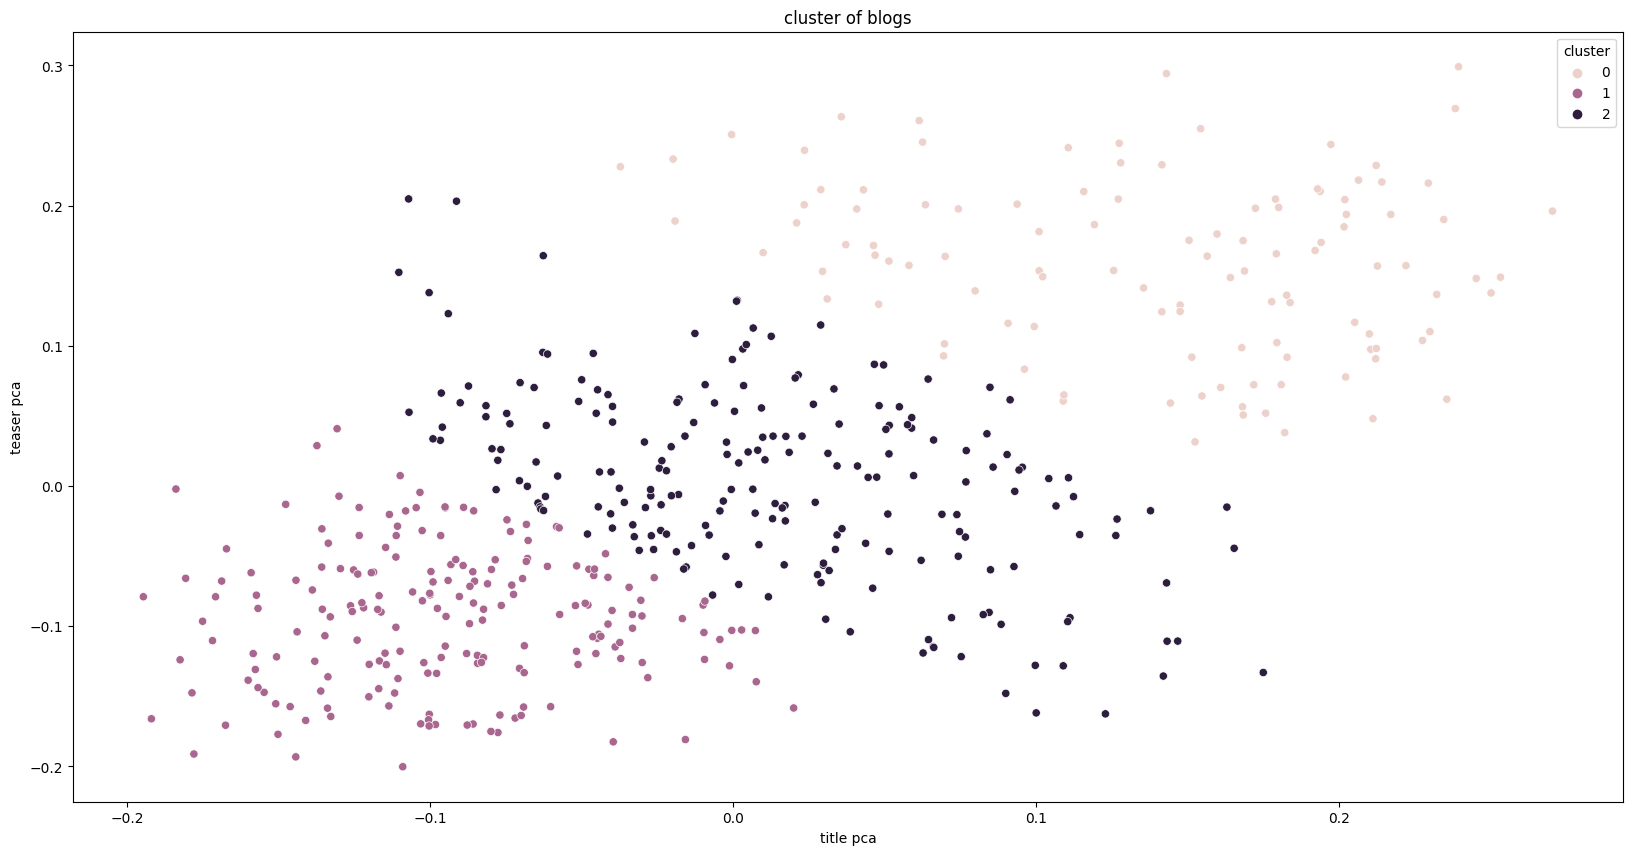

In [95]:
plt.figure(figsize=(20, 10))
plt.title('cluster of blogs')
sns.scatterplot(data=df, x='title pca', y='teaser pca', hue='cluster')
plt.show()